In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import tensorflow.keras.utils as ku
import tensorflow.keras.models as km
import tensorflow.keras.layers as kl
import tensorflow.keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12191740210490727581
]


In [3]:
import tensorflow
tensorflow.__version__

'1.13.0-rc2'

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


In [5]:
x_train = x_train.astype('float32') / 255. # Pour normaliser toutes les valeurs 
x_test = x_test.astype('float32') / 255.# Pour normaliser toutes les valeurs 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
autoencoder = km.Sequential()
autoencoder.add(kl.Dense(32, activation='relu', input_shape=(784,)))
autoencoder.add(kl.Dense(784, activation='sigmoid'))

In [6]:
# apprentissage
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
ts = time.time()
history = autoencoder.fit(x_train, x_train,
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.3717 - acc: 0.7421 - val_loss: 0.2715 - val_acc: 0.7943
Epoch 2/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.2643 - acc: 0.7967 - val_loss: 0.2536 - val_acc: 0.7965
Epoch 3/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2437 - acc: 0.7971 - val_loss: 0.2316 - val_acc: 0.7968
Epoch 4/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.2237 - acc: 0.7974 - val_loss: 0.2138 - val_acc: 0.7976
Epoch 5/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2089 - acc: 0.7981 - val_loss: 0.2016 - val_acc: 0.7983
Epoch 6/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1984 - acc: 0.7991 - val_loss: 0.1924 - val_acc: 0.7996
Epoch 7/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.1899 - acc: 0.8003 - val_loss: 0.1848 - val_acc

In [7]:
autoencoder_imgs = autoencoder.predict(x_test)

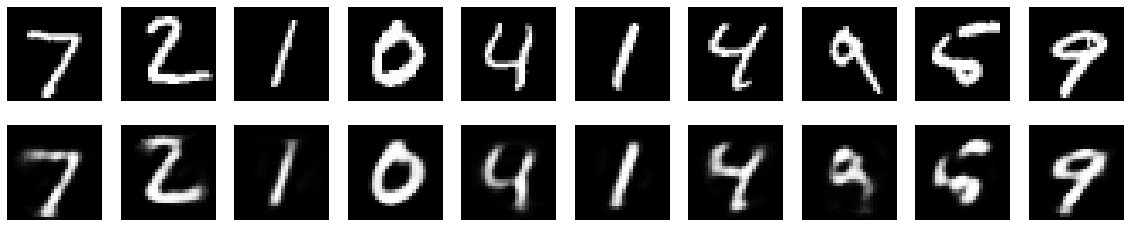

In [8]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
autoencoder.layers


## Autoencoder SPARSE

In [51]:
from keras import regularizers

encoder = km.Sequential(name="plop1")
encoder.add(kl.Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-5), input_shape=(784,),name="plop"))

decoder = km.Sequential()
decoder.add(kl.Dense(784, activation='sigmoid',activity_regularizer=regularizers.l1(10e-5), input_shape =(32,) ))

autoencoder = km.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [52]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
plop1 (Sequential)           (None, 32)                25120     
_________________________________________________________________
sequential_28 (Sequential)   (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [54]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')
ts = time.time()
history = autoencoder.fit(x_train, x_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test,x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2449 - val_loss: 0.2357
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2306 - val_loss: 0.2234
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2196 - val_loss: 0.2138
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2111 - val_loss: 0.2064
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2043 - val_loss: 0.2002
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1985 - val_loss: 0.1948
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1935 - val_loss: 0.1901
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1890 - val_loss: 0.1858
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1851 - val_

In [14]:
autoencoder_imgs = autoencoder.predict(x_test)
encoder_imgs = encoder.predict(x_test)



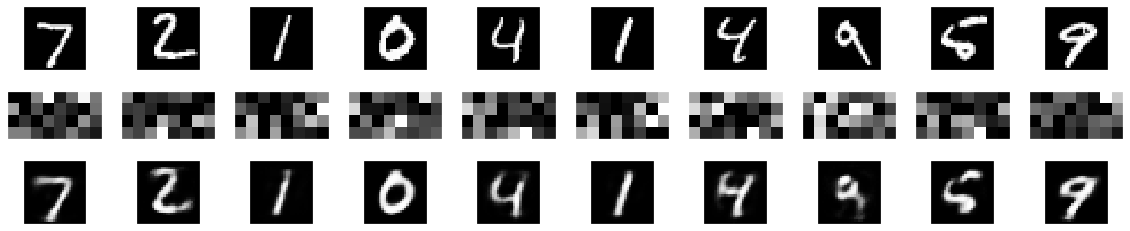

In [18]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoder_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(array([   3.,   22.,  846., 2349., 2769., 2191., 1179.,  471.,  124.,
          46.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Patch objects>)

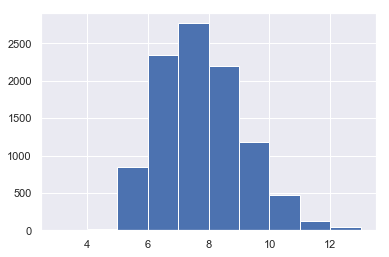

In [25]:
plt.hist(np.sum(encoder_imgs==0,axis=1))

In [62]:
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

autoencoder = km.Sequential()

autoencoder.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28,28,1) ,activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [63]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 4, 4, 8)           584       
__________

In [65]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [ ]:
#apprentissage
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
ts = time.time()
history = autoencoder.fit(x_train, x_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 50s 828us/step - loss: 0.2129 - acc: 0.7941 - val_loss: 0.1663 - val_acc: 0.8028
Epoch 2/50
60000/60000 [==============================] - 50s 829us/step - loss: 0.1510 - acc: 0.8011 - val_loss: 0.1416 - val_acc: 0.8001
Epoch 3/50
60000/60000 [==============================] - 51s 849us/step - loss: 0.1378 - acc: 0.8045 - val_loss: 0.1328 - val_acc: 0.8078
Epoch 4/50
60000/60000 [==============================] - 50s 842us/step - loss: 0.1309 - acc: 0.8062 - val_loss: 0.1300 - val_acc: 0.8090
Epoch 5/50
60000/60000 [==============================] - 50s 840us/step - loss: 0.1262 - acc: 0.8072 - val_loss: 0.1229 - val_acc: 0.8093
Epoch 6/50
60000/60000 [==============================] - 52s 859us/step - loss: 0.1231 - acc: 0.8080 - val_loss: 0.1195 - val_acc: 0.8098
Epoch 7/50
60000/60000 [==============================] - 51s 851us/step - loss: 0.1207 - acc: 0.8085 - val_loss: 0.